# Implementation of LSTM on Nifty 50 Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score
import warnings
import seaborn as sns
import tensorflow as tf

In [2]:
warnings.filterwarnings("ignore")

In [6]:
# Load the data
banknifty = pd.read_csv("banknifty_historical_data 2007- 2023.csv")

In [7]:
print(banknifty.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [8]:
# Convert the 'Date' column to datetime and set it as the index
banknifty['Date'] = pd.to_datetime(banknifty['Date'])
banknifty.set_index('Date', inplace=True)

In [9]:
banknifty.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,6898.000000,6977.200195,6843.000000,6897.100098,6897.020020,0.0
2007-09-18,6921.149902,7078.950195,6883.600098,7059.649902,7059.567871,0.0
2007-09-19,7111.000000,7419.350098,7111.000000,7401.850098,7401.764160,0.0
2007-09-20,7404.950195,7462.899902,7343.600098,7390.149902,7390.063965,0.0
2007-09-21,7378.299805,7506.350098,7367.149902,7464.500000,7464.413086,0.0


In [11]:
#Checking null value
print(banknifty.isnull().sum())

Open         301
High         301
Low          301
Close        301
Adj Close    301
Volume       301
dtype: int64


In [12]:
#dealing with missing values by thaking its previous value
banknifty = nifty_50_df.ffill()

In [13]:
print(banknifty.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


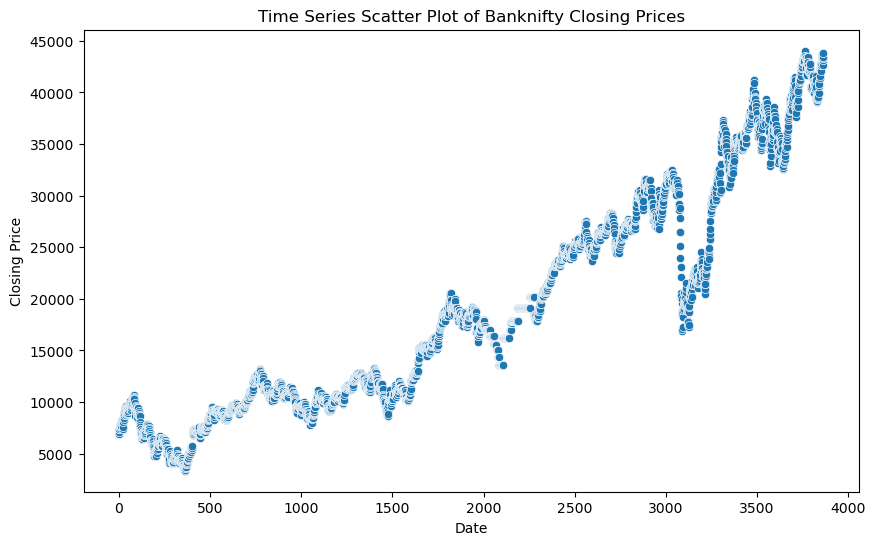

In [16]:
# Time Series Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=banknifty.index, y=banknifty['Close'])
plt.title('Time Series Scatter Plot of Banknifty Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [17]:
# Prepare the data for modeling
data = banknifty[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [18]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [19]:
# Create a function to create datasets for training and testing
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [20]:
# Create the training and testing datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
# Reshape the data for GRU layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
# Create the GRU model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.4))
model.add(LSTM(160, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [24]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - loss: 0.0085 - mean_absolute_percentage_error: 383.4479 - val_loss: 7.1870e-04 - val_mean_absolute_percentage_error: 3.0149
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 1.9875e-04 - mean_absolute_percentage_error: 4287.8462 - val_loss: 7.3102e-04 - val_mean_absolute_percentage_error: 3.0329
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 1.8738e-04 - mean_absolute_percentage_error: 3676.2366 - val_loss: 7.1224e-04 - val_mean_absolute_percentage_error: 2.9942
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 1.6229e-04 - mean_absolute_percentage_error: 20024.8066 - val_loss: 0.0011 - val_mean_absolute_percentage_error: 3.8743
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 1.6601e-04 - mean_absolute_percentage_error: 1094.1741 - val_loss: 6.4182e-04 - val_mean_absolute_percentage_error: 2.8598
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 1.7881e-04 - mean_absolute_

82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 8.9279e-05 - mean_absolute_percentage_error: 1899.5876 - val_loss: 5.9486e-04 - val_mean_absolute_percentage_error: 2.9081
Epoch 39/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 1.0379e-04 - mean_absolute_percentage_error: 17760.2676 - val_loss: 2.8547e-04 - val_mean_absolute_percentage_error: 1.9043
Epoch 40/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - loss: 7.7977e-05 - mean_absolute_percentage_error: 603.6780 - val_loss: 5.8162e-04 - val_mean_absolute_percentage_error: 2.8507
Epoch 41/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 9.7725e-05 - mean_absolute_percentage_error: 4836.9072 - val_loss: 4.0511e-04 - val_mean_absolute_percentage_error: 2.3257
Epoch 42/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 9.1315e-05 - mean_absolute_percentage_error: 9013.6699 - val_loss: 3.0388e-04 - val_mean_absolute_percentage_error: 1.9829
Epoch 43/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 8.5066e-05 - mean_absolut

In [25]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [26]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
# Inverse transform the original values
original_y_train = scaler.inverse_transform([y_train])
original_y_test = scaler.inverse_transform([y_test])

In [28]:
# Create plots for the predicted values
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

In [29]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

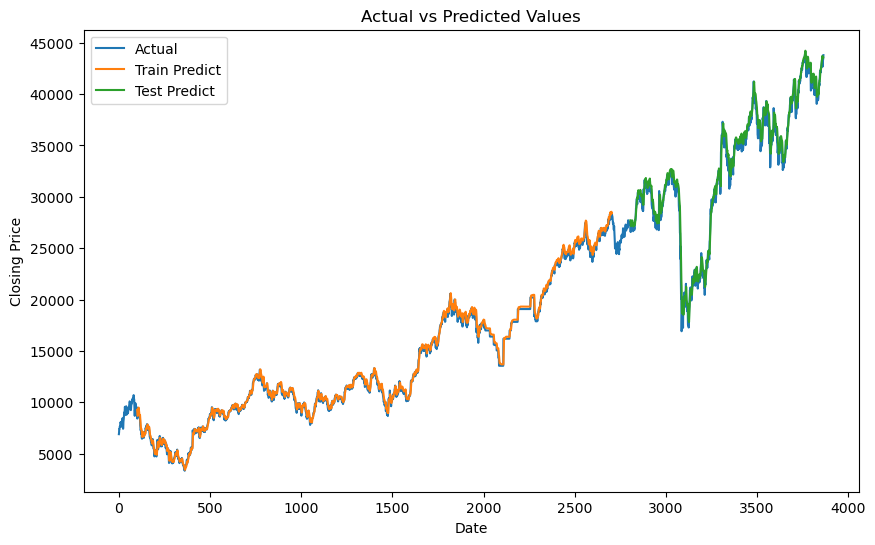

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

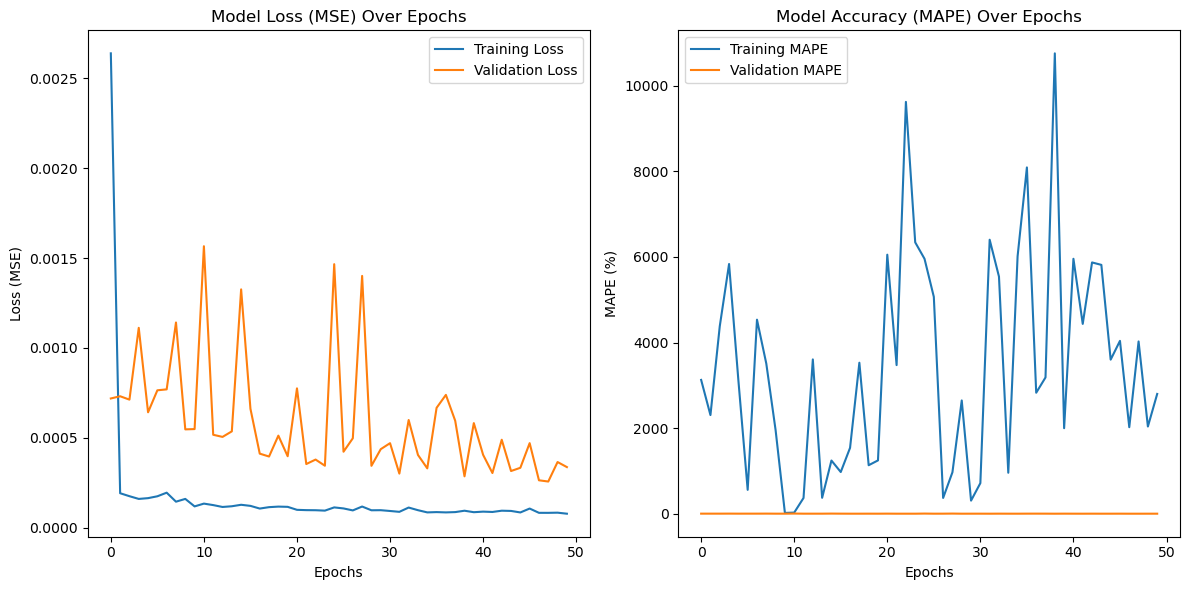

In [31]:
# Plot the model loss and MAPE over epochs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAPE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.title('Model Accuracy (MAPE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAPE (%)')
plt.legend()

plt.tight_layout()
plt.show()

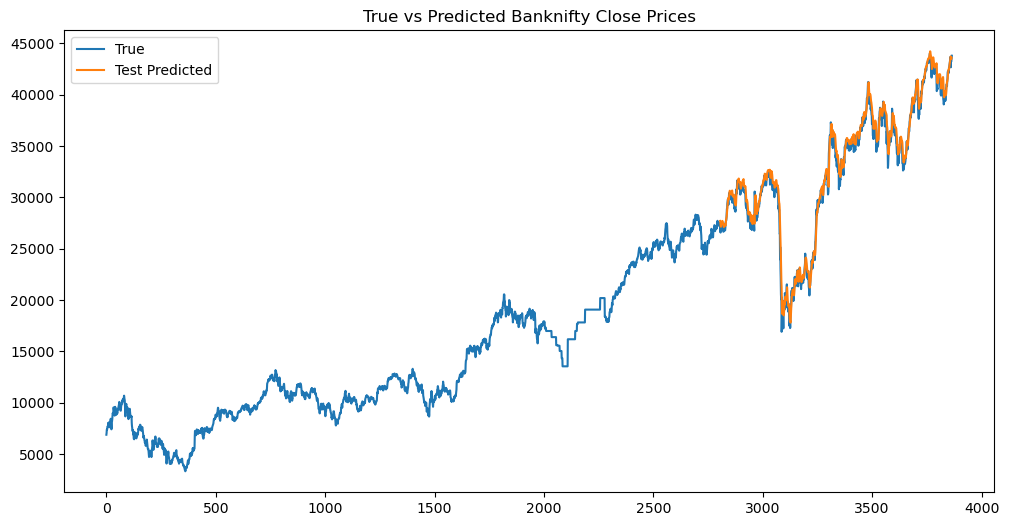

In [32]:
# Plot true vs predicted residuals
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="True")
plt.plot(test_predict_plot, label="Test Predicted")
plt.title("True vs Predicted Banknifty Close Prices")
plt.legend()
plt.show()

In [33]:
# Calculate R² score, rmse, mae, mse, mate, smate for training and testing sets
train_r2 = r2_score(original_y_train[0], train_predict[:, 0])
test_r2 = r2_score(original_y_test[0], test_predict[:, 0])

train_rmse = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0]))

train_mae = mean_absolute_error(original_y_train[0], train_predict[:, 0])
test_mae = mean_absolute_error(original_y_test[0], test_predict[:, 0])

train_mse = mean_squared_error(original_y_train[0], train_predict[:, 0])
test_mse = mean_squared_error(original_y_test[0], test_predict[:, 0])

train_mate = median_absolute_error(original_y_train[0], train_predict[:, 0])
test_mate = median_absolute_error(original_y_test[0], test_predict[:, 0])

train_smate = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0])) / np.mean(original_y_train)
test_smate = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0])) / np.mean(original_y_test)

print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

print("Training RMSE: ", train_rmse)
print("Testing RMSE: ", test_rmse)

print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training MATE: ", train_mate)
print("Testing MATE: ", test_mate)

print("Training SMATE: ", train_smate)
print("Testing SMATE: ", test_smate)

Train R²: 0.9974906114085949
Test R²: 0.9864551797024533
Training RMSE:  302.3311575398903
Testing RMSE:  747.2834206852103
Training MAE:  227.4456761890778
Testing MAE:  554.406825387748
Training MSE:  91404.12881940995
Testing MSE:  558432.5108309891
Training MATE:  187.59521484375
Testing MATE:  435.2753909999992
Training SMATE:  0.021973340942369204
Testing SMATE:  0.02287107651801398


In [34]:
from tabulate import tabulate
import numpy as np
# Create a table
table = [
    ["Metric", "Training", "Testing"],
    ["R² Score", f"{train_r2:.4f}", f"{test_r2:.4f}"],
    ["RMSE", f"{train_rmse:.4f}", f"{test_rmse:.4f}"],
    ["MSE", f"{train_mse:.4f}", f"{test_mse:.4f}"],
    ["MAE", f"{train_mae:.4f}", f"{test_mae:.4f}"],
    ["MATE", f"{train_mate:.4f}", f"{test_mate:.4f}"],
    ["SMATE", f"{train_smate:.4f}", f"{test_smate:.4f}"]
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+----------+------------+-------------+
| Metric   |   Training |     Testing |
+==========+============+=============+
| R² Score |     0.9975 |      0.9865 |
+----------+------------+-------------+
| RMSE     |   302.331  |    747.283  |
+----------+------------+-------------+
| MSE      | 91404.1    | 558433      |
+----------+------------+-------------+
| MAE      |   227.446  |    554.407  |
+----------+------------+-------------+
| MATE     |   187.595  |    435.275  |
+----------+------------+-------------+
| SMATE    |     0.022  |      0.0229 |
+----------+------------+-------------+
